**Андрей, привет!**

Меня зовут Василий Митров и я буду проверять твой проект. Предлагаю общаться на «ты». Если это неприемлемо, то дай мне знать и мы перейдем на «вы». Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных.

Для удобства я оставлю комментарии в отдельных ячейках Markdown с заголовком «Комментарий ревьюера». Пожалуйста, не перемещай, не изменяй и не удаляй их - так наше общение будет более продуктивным. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера</b> 
    
✍ Так выделены самые важные замечания. Без их отработки проект не будет принят. При проверке я обращаю внимание не только на код, но и на интерпретацию и анализ результатов, а также соответствие данных техническому заданию.
</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера</b> 
    
📝 Так выделены небольшие замечания или рекомендации. Постарайся, пожалуйста, учесть эти комментарии в этом проекте или в будущих проектах.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера</b> 
    
👍 Так выделены все остальные комментарии, включая рекомендации, позитивные моменты или какие-то рассуждения и пояснения.
</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:

<div class="alert alert-info"> 
<b>Комментарий студента</b> 
    
Например, вот так. Также, если есть какие-то вопросы, или что-то осталось непонятным по ревью - спрашивай в таких блоках и я постараюсь дать ответ.
</div>

---

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-warning">
<b>Комментарий ревьюера v.1</b> 
    
📝 
Отличная практика - расписывать цель и основные этапы своими словами (этот навык очень поможет на фильнальном проекте). Хорошо было бы добавить ход и цель исследования. Пример можно посмотреть в самом первом проекте (Музыка городов)
</div>

### Откройте файл с данными и изучите общую информацию. 

In [1]:
#импортируем основные библиотеки, которые будем использовать в проекте:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from pandas.core.common import SettingWithCopyWarning
import warnings

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [3]:
#загрзуим исходные данные:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

<div class="alert alert-warning">
<b>Комментарий ревьюера v.1</b> 
    
📝 
Совет: выносить загрузку в отдельную ячейку в соответствии с PEP8.
</div>

In [4]:
#посмотрим первые 10 строк таблицы:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


In [5]:
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,"9,700,000.00",133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,NaN,False,False,13.83,NaN,Санкт-Петербург,"24,665.00","4,232.00",1.00,796.00,3.00,381.00,NaN
23695,14,"3,100,000.00",59.00,2018-01-15T00:00:00,3,NaN,5.00,38.00,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00
23696,18,"2,500,000.00",56.70,2018-02-11T00:00:00,2,NaN,3.00,29.70,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,"11,475,000.00",76.75,2017-03-28T00:00:00,2,3.00,17.00,NaN,12,NaN,False,False,23.30,2.00,Санкт-Петербург,"39,140.00","10,364.00",2.00,173.00,3.00,196.00,602.00
23698,4,"1,350,000.00",32.30,2017-07-21T00:00:00,1,2.50,5.00,12.30,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#посмотрим типы данных в столбцах:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [7]:
# общая инф-ция о количественных данных

data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


<div class="alert alert-danger">
<b>Комментарий ревьюера v.1</b> 
    
✍ 
Отсутствует шаг ТЗ: "Постройте общую гистограмму для всех числовых столбцов таблицы."
</div>

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

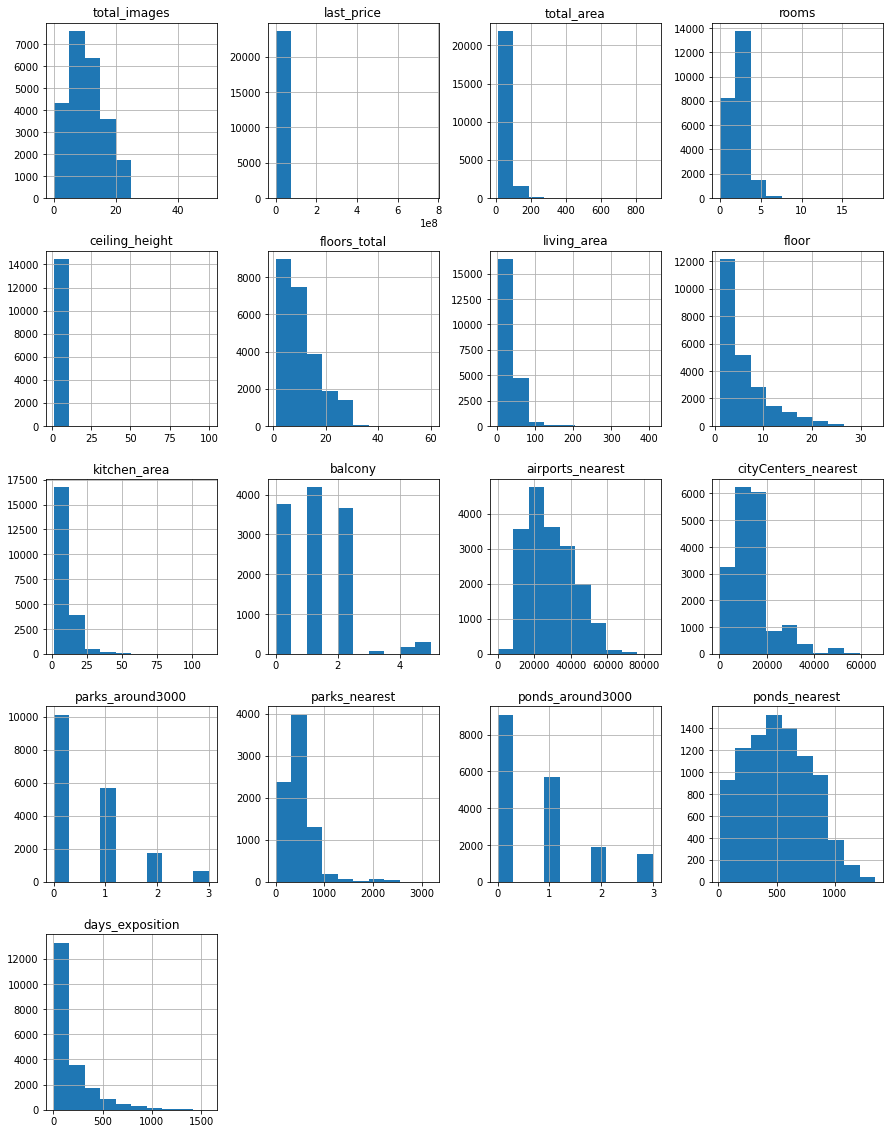

In [8]:
data.hist(figsize=(15, 20))

<div class="alert alert-success">
<b>Комментарий ревьюера v.2</b> 
    
👍 
Предупреждения перед графиками можно убрать 2 способами:
    
1. В конец кода добавить `plt.show()`, но для этого нужно вызвать библиотеку matplotlib.pyplot as plt
2. В конец кода добавить `;`
    
</div>

### Предобработка данных

<font color='green'>
Выводы:
В данных замечены следующие проблемы
1. отсутствую значения (есть пропуски) в столбцах:
    <br>1. ceiling_height
    <br>2. floors_total
    <br>3. living_area
    <br>4. is_apartment
    <br>5. kitchen_area
    <br>6. balcony
    <br>7. locality_name
    <br>8. airports_nearest
    <br>9. cityCenters_nearest
    <br>10. parks_around3000
    <br>11. parks_nearest
    <br>12. ponds_around3000
    <br>13. ponds_nearest
    <br>14. days_exposition

2. названия столбцов - нужно переименовать столбцы
    <br>1. cityCenters_nearest
    <br>2. parks_around3000
    <br>3. ponds_around3000
    <br>4. studio
    <br>5. open_plan
    
3. некорректные типы данных в стоблцах:
    <br>1. is_apartment 
</font>

In [9]:
#переименуем столбцы:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                        'parks_around3000': 'parks_around_3000', 
                        'ponds_around3000': 'ponds_around_3000',
                        'studio': 'is_studio',
                        'open_plan': 'is_open_plan'
                       })
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

<font color='green'> напишем фунции для описания типичных значений количественных столбцов и для исследования столбцов с пропусками </font>

In [10]:
# напишем фунции для описания типичных значений количественных столбцов и для исследования столбцов с пропусками

def describe(df, col):
    blank = df[col].isna().sum()
    types = data.dtypes[col]
    info = df[col].describe()
    print('Число пропусков:', blank)
    print('Типы данных:', types)
    print('Описание:', info)


def histogramm(df, name, title, xlim, bins = 10):
    plt.figure(figsize=(10,3))
    df.hist(bins = bins)
    plt.xlim(0,xlim)
    plt.xlabel(name)
    plt.title(title)
    plt.ticklabel_format(style='plain') 
    plt.show()

<font color='green'> ceiling_height </font>

Число пропусков: 9195
Типы данных: float64
Описание: count   14,504.00
mean         2.77
std          1.26
min          1.00
25%          2.52
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: float64


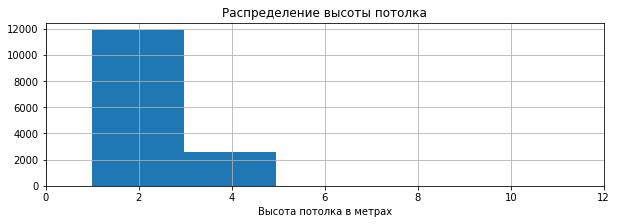

In [11]:
describe(data, 'ceiling_height')

histogramm(data.ceiling_height, 'Высота потолка в метрах','Распределение высоты потолка', 12, 50)


<font color='green'> Исходя из здравого смысла и строительных норм, потолков меньше 2.5 и больше 12 практически быть не может. Всего 97 таких "странных" квартир. </font>

In [12]:
display((data[data['ceiling_height'] > 12]['ceiling_height'].count() + 
         data[data['ceiling_height'] < 2.5]['ceiling_height'].count()))

97

In [13]:
#избавимся от выбросов в виде 100 метров
data.loc[(data['ceiling_height'] < 2.5) | (data['ceiling_height'] > 12), 'ceiling_height'] = None

<font color='green'> floors_total, floor </font>

Число пропусков: 86
Типы данных: float64
Описание: count   23,613.00
mean        10.67
std          6.60
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         60.00
Name: floors_total, dtype: float64


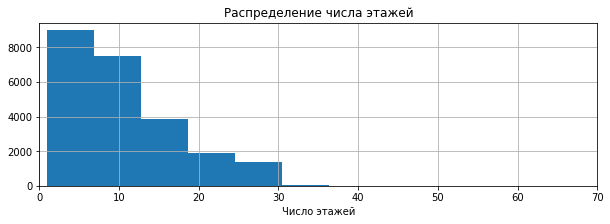

In [14]:
describe(data, 'floors_total')
histogramm(data.floors_total, 'Число этажей','Распределение числа этажей', 70, 10)
data.loc[data['floors_total'].isnull(), 'floors_total'] = data.loc[data['floors_total'].isnull(), 'floor']
data.floors_total = data.floors_total.astype('int')

Число пропусков: 0
Типы данных: int64
Описание: count   23,699.00
mean         5.89
std          4.89
min          1.00
25%          2.00
50%          4.00
75%          8.00
max         33.00
Name: floor, dtype: float64


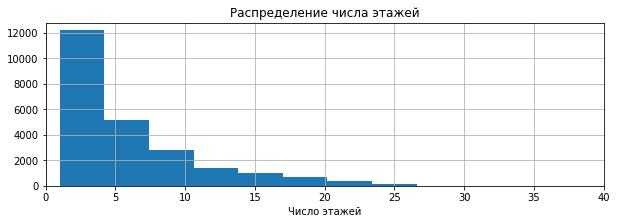

In [15]:
describe(data, 'floor')
histogramm(data.floor, 'Число этажей','Распределение числа этажей', 40, 10)

<font color='green'> Столбец floor - этаж квартиры - заполняют все, однако floor_total - высота дома - заполняют не все. Предлагаю заполнить 86 пропусков в floor_total значением floor </font>

In [16]:
data.loc[data['floors_total'].isnull(), 'floors_total'] = data.loc[data['floors_total'].isnull(), 'floor']


<div class="alert alert-warning">
<b>Комментарий ревьюера v.2</b> 
    
📝 
Доля пропусков здесь менее 5% и для экономии времени их можно удалить.
</div>

<font color='green'> Площадь: total_area,  kitchen_area, living_area </font>

<font color='green'> ~90% квартир до 100 метров, наиболее типичная общая площадь - 52-60 метров</font>

Число пропусков: 0
Типы данных: float64
Описание: count   23,699.00
mean        60.35
std         35.65
min         12.00
25%         40.00
50%         52.00
75%         69.90
max        900.00
Name: total_area, dtype: float64


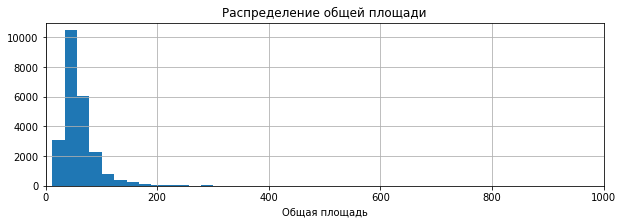

In [17]:
describe(data, 'total_area')
histogramm(data.total_area, 'Общая площадь','Распределение общей площади',1000, 40)

<font color='green'> ~90% квартир до 60 метров жилой площади. Наиболее типичная 30-34 метра  </font>

Число пропусков: 1903
Типы данных: float64
Описание: count   21,796.00
mean        34.46
std         22.03
min          2.00
25%         18.60
50%         30.00
75%         42.30
max        409.70
Name: living_area, dtype: float64


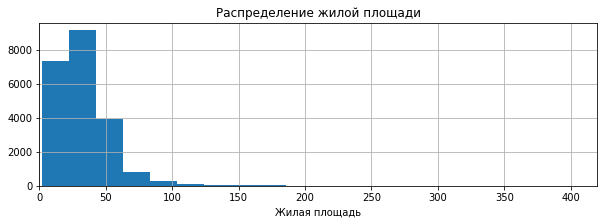

In [18]:
describe(data, 'living_area')
histogramm(data.living_area, 'Жилая площадь','Распределение жилой площади',420, 20)

<font color='green'> Типичная площадь кухни - 9-10 метров  </font>

Число пропусков: 2278
Типы данных: float64
Описание: count   21,421.00
mean        10.57
std          5.91
min          1.30
25%          7.00
50%          9.10
75%         12.00
max        112.00
Name: kitchen_area, dtype: float64


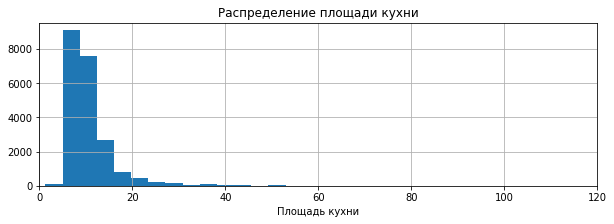

In [19]:
describe(data, 'kitchen_area')
histogramm(data.kitchen_area, 'Площадь кухни','Распределение площади кухни',120, 30)

<font color='green'> is_apartment - заменим тип данных на булев и заполним пробелы, как в доке </font>

In [20]:
data['is_apartment'] = data['is_apartment'].fillna('')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['is_apartment'].value_counts()


False    23649
True        50
Name: is_apartment, dtype: int64

<div class="alert alert-success">
<b>Комментарий ревьюера v.2</b> 
    
👍 Все верно, либо это апартаменты, либо нет. Булев тип подходит лучше всего.
</div>

<font color='green'> balcony - если не указано кол-во балконов, то их нет. Заменим в таких случаях на 0. Заменим тип данных на целочисленный. </font>

Число пропусков: 11519
Типы данных: float64
Описание: count   12,180.00
mean         1.15
std          1.07
min          0.00
25%          0.00
50%          1.00
75%          2.00
max          5.00
Name: balcony, dtype: float64


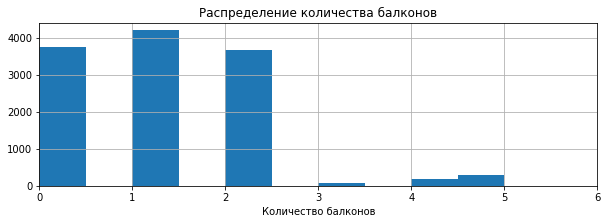

In [21]:
describe(data, 'balcony')
histogramm(data.balcony, 'Количество балконов','Распределение количества балконов', 6, 10)
data['balcony'] = data['balcony'].fillna(0).astype('int')


<div class="alert alert-success">
<b>Комментарий ревьюера v.2</b> 
    
👍 Верно, люди не заполняют "не выгодные" для продажи квартиры характеристики.
</div>

<font color='green'> locality_name - всего 49 объектов без названия города</font>

In [22]:
data['locality_name'].isnull().sum()

49

In [23]:
# удаляем записи без названия - они, по сути, никому не нужны, так как не понятно где объект
data = data.dropna(subset=['locality_name'])
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')# меняем посЁлок на поселок - неявные дубликаты
data['locality_name'].value_counts()


Санкт-Петербург               15721
поселок Мурино                  556
поселок Шушары                  440
Всеволожск                      398
Пушкин                          369
                              ...  
деревня Сижно                     1
деревня Тихковицы                 1
деревня Снегиревка                1
деревня Пельгора                  1
садовое товарищество Садко        1
Name: locality_name, Length: 330, dtype: int64

<div class="alert alert-success">
<b>Комментарий ревьюера v.2</b> 
    
👍 
Можно например вот так:
    
    df = df.apply(lambda x: x.replace({'поселок':'посёлок', 'городской посёлок': 'посёлок', 'посёлок городского типа': 'посёлок', 'коттеджный посёлок': 'посёлок', 'посёлок при железнодорожной станции': 'посёлок станции'}, regex=True))

    len(df.locality_name.unique())
</div>

<font color='green'> airports_nearest - оставим как есть </font>

Число пропусков: 5534
Типы данных: float64
Описание: count   18,116.00
mean    28,803.23
std     12,637.31
min          0.00
25%     18,575.75
50%     26,756.50
75%     37,294.00
max     84,869.00
Name: airports_nearest, dtype: float64


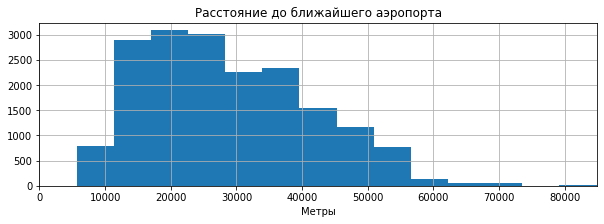

In [24]:
describe(data, 'airports_nearest')
histogramm(data.airports_nearest, 'Метры','Расстояние до ближайшего аэропорта', 85000, 15)


<font color='green'> city_centers_nearest - оставим как есть </font>

Число пропусков: 5511
Типы данных: float64
Описание: count   18,139.00
mean    14,197.86
std      8,606.83
min        181.00
25%      9,241.00
50%     13,105.00
75%     16,293.00
max     65,968.00
Name: city_centers_nearest, dtype: float64


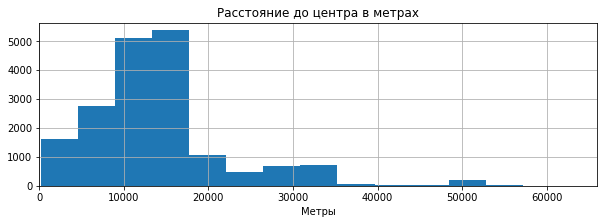

In [25]:
describe(data, 'city_centers_nearest')
histogramm(data.city_centers_nearest, 'Метры','Расстояние до центра в метрах', 66000, 15)

<font color='green'> parks_around_3000 </font>

Число пропусков: 5510
Типы данных: float64
Описание: count   18,140.00
mean         0.61
std          0.80
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          3.00
Name: parks_around_3000, dtype: float64


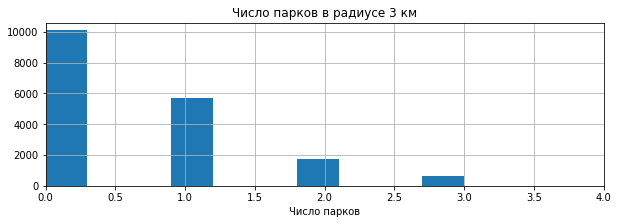

In [26]:
describe(data, 'parks_around_3000')
histogramm(data.parks_around_3000, 'Число парков','Число парков в радиусе 3 км', 4, 10)

<font color='green'> parks_nearest - заполним 0 значениями (по аналогии с балконами) и приведем к int формату. </font>

Число пропусков: 15586
Типы данных: float64
Описание: count   8,064.00
mean      490.83
std       342.55
min         1.00
25%       288.00
50%       454.50
75%       612.00
max     3,190.00
Name: parks_nearest, dtype: float64


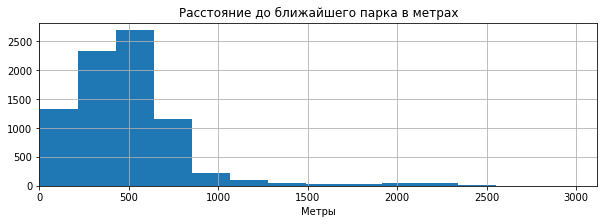

In [27]:
describe(data, 'parks_nearest')
histogramm(data.parks_nearest, 'Метры','Расстояние до ближайшего парка в метрах', xlim = 3120, bins = 15)
data['parks_nearest'] = data['parks_nearest'].fillna(0).astype('int')


Число пропусков: 5510
Типы данных: float64
Описание: count   18,140.00
mean         0.77
std          0.94
min          0.00
25%          0.00
50%          1.00
75%          1.00
max          3.00
Name: ponds_around_3000, dtype: float64


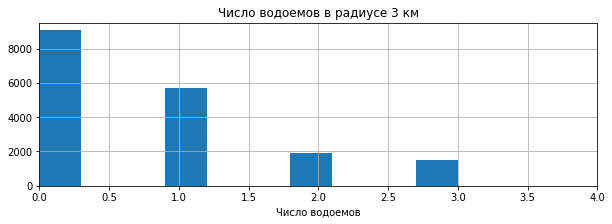

In [28]:
describe(data, 'ponds_around_3000')
histogramm(data.ponds_around_3000, 'Число водоемов','Число водоемов в радиусе 3 км', xlim = 4, bins = 10)


Число пропусков: 14565
Типы данных: float64
Описание: count   9,085.00
mean      518.06
std       277.84
min        13.00
25%       293.00
50%       502.00
75%       730.00
max     1,344.00
Name: ponds_nearest, dtype: float64


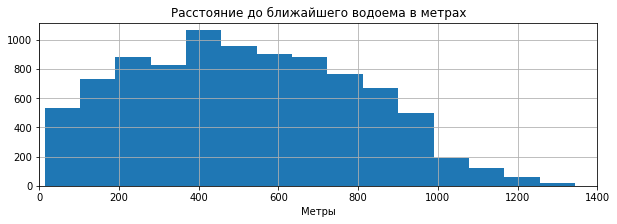

In [29]:
describe(data, 'ponds_nearest')
histogramm(data.ponds_nearest, 'Метры','Расстояние до ближайшего водоема в метрах', xlim = 1400, bins = 15)


<font color='green'> first_day_exposition, days_exposition - приведем строки в даты. Проверим, за какой период объявления.
Данные с 27 ноября 2014 по 3 мая 2019 г., резкий рост начался в начале 2017 г. </font>

2014-11-27 00:00:00 2019-05-03 00:00:00


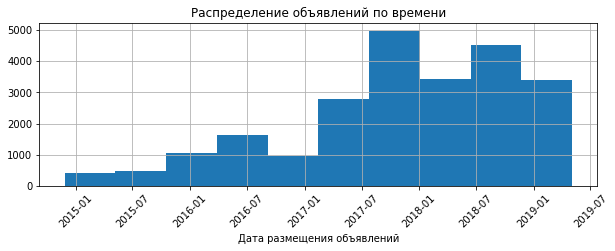

In [30]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
print(data['first_day_exposition'].min(), data['first_day_exposition'].max())
plt.figure(figsize=(10,3))
plt.hist(data['first_day_exposition'])
plt.xticks(rotation=45)
plt.grid()
plt.xlabel('Дата размещения объявлений')
plt.title('Распределение объявлений по времени')
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера v.2</b> 
    
👍 При чтении файла можно указать параметр `parse_dates: parse_dates=['first_day_exposition']`. Тогда пандас автоматически переведет список столбцов в даты. 
</div>

Число пропусков: 3180
Типы данных: float64
Описание: count   20,470.00
mean       180.75
std        219.78
min          1.00
25%         45.00
50%         95.00
75%        231.00
max      1,580.00
Name: days_exposition, dtype: float64


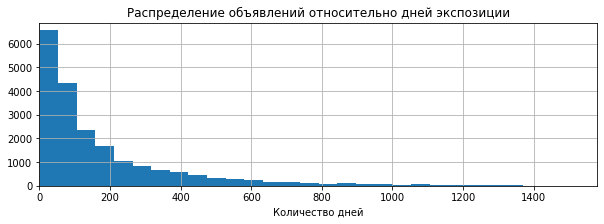

In [31]:
describe(data, 'days_exposition')
histogramm(data.days_exposition, 'Количество дней','Распределение объявлений относительно дней экспозиции',  1580, 30)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        14393 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  is_studio             23650 non-null  bool          
 11  is_open_plan          23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

In [33]:
duplicated = data[data.duplicated()]

print("\n\nПовторяющиеся строки : \n {}".format(duplicated))



Повторяющиеся строки : 
 Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, is_studio, is_open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest, days_exposition]
Index: []


<font color='green'> явных дубликатов нет - выше проверка. Привел Floor_total к int формату </font>

<div class="alert alert-danger">
<b>Комментарий ревьюера v.2</b> 
    
✍ 
Осталось поправить:
    
* Нет проверки явных дубликатов
    
* Обрати, пожалуйста, внимание на тип данных в floors_total. Врядли он должен быть дробным.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v.3</b> 
    
👍 

</div>

### Посчитайте и добавьте в таблицу новые столбцы

цена одного квадратного метра;

In [34]:
#вычислим цену квадратного метра в дополнительном столбце:
data['cost_per_meter'] = data.last_price.div(data.total_area)

день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
месяц публикации объявления;
год публикации объявления;

In [35]:
#добавим дополнительные столбцы - день недели, месяц и год публикации объявления
#день недели:
data['day_of_week'] = data['first_day_exposition'].dt.weekday
#месяц:
data['month'] = data['first_day_exposition'].dt.month
#год:
data['year'] = data['first_day_exposition'].dt.year

<div class="alert alert-warning">
<b>Комментарий ревьюера v.2</b> 
    
📝 
Совет на будущие работы: обычно в датафреймах содержатся данные за несколько лет. Важно выбрать корректный метод для вычленения месяца, иначе месяца разных годов могут стать одним месяцем. Обрати внимание на метод astype('datetime64[M]'). Для его использования не нужно обращаться к pd.DatetimeIndex. 
    
Вот хорошая статья на этот счёт: 
    
    https://pythobyte.com/how-to-work-with-dates-and-times-in-python-0a176355/
    
    и
    
    https://stackoverflow.com/questions/70901855/get-hour-and-minutes-and-seconds-from-numpy-datetime64
    
Этот метод нужен для визуализации динамики по неделям, месяцам или годам (смотря какой метод выберешь)
    
Код выглядит так:
    
        df['first_day_exposition'].dt.date #приводим к временному формату
        df['first_day_exposition'].astype('datetime64[M]') 
    
Если года разные, то в новой колонке месяца у тебя отобразится первый день месяца ('2019-05-01')
</div>

тип этажа квартиры (значения — «‎первый», «последний», «другой»);

In [36]:
#функция, для определения категории этажа - первый, последний, другой:
def what_floor(row):                    
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == floors_total:
        return 'Последний'
    if floor == 1:
        return "Первый"
    else:
        return "Другой"
    
# этаж, на котором расположена квартира; варианты — первый, последний, другой
data['what_floor'] = data.apply(what_floor, axis=1)        

# соотношение жилой и общей площади:
data['living_total_ratio'] = data.living_area.div(data.total_area) 

# отношение площади кухни к общей:
data['kitchen_total_ratio'] = data.kitchen_area.div(data.total_area)

расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [37]:
data['city_centers_nearest_km'] = data['city_centers_nearest'].div(1000).fillna(0).apply(np.ceil)

<div class="alert alert-danger">
<b>Комментарий ревьюера v.1</b> 
    
✍ 
<s>Аналогично, прошу разбить на дейстия.
</div>

### Проведите исследовательский анализ данных

1. Изучите следующие параметры объектов:

<font color='green'> общая площадь: </font >

<font color='green'> средняя общая площадь продаваемой квартиры 60м. Медиана 52 м </font>

Число пропусков: 0
Типы данных: float64
Описание: count   23,650.00
mean        60.33
std         35.66
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        900.00
Name: total_area, dtype: float64


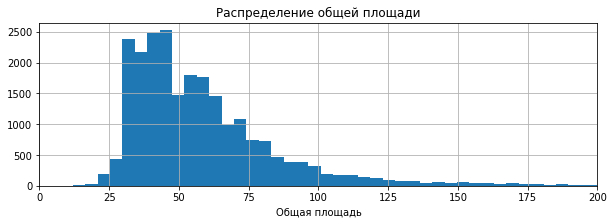

In [38]:
describe(data, 'total_area')
histogramm(data.total_area, 'Общая площадь','Распределение общей площади', xlim = 200, bins = 200)

<div class="alert alert-success">
<b>Комментарий ревьюера v.2</b> 
    
👍 Верно, с большей площадью меньше предложений. Объекты выше 90-100 кв. м - это более дорогой сегмент.
</div>

Число пропусков: 1898
Типы данных: float64
Описание: count   21,752.00
mean        34.45
std         22.04
min          2.00
25%         18.60
50%         30.00
75%         42.30
max        409.70
Name: living_area, dtype: float64


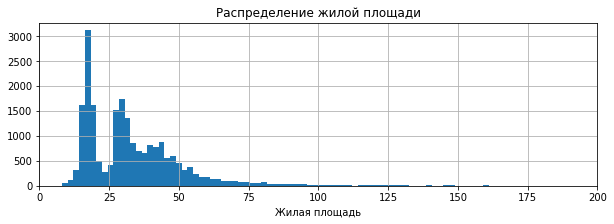

In [39]:
describe(data, 'living_area')
histogramm(data.living_area, 'Жилая площадь','Распределение жилой площади', xlim = 200, bins = 200)

<font color='green'> площадь кухни: Типичная площадь кухни - 9-10 метров
</font>

Число пропусков: 2269
Типы данных: float64
Описание: count   21,381.00
mean        10.57
std          5.90
min          1.30
25%          7.00
50%          9.10
75%         12.00
max        112.00
Name: kitchen_area, dtype: float64


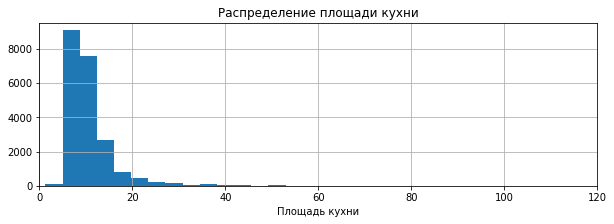

In [40]:
describe(data, 'kitchen_area')
histogramm(data.kitchen_area, 'Площадь кухни','Распределение площади кухни', xlim = 120, bins = 30)

<font color='green'> цена объекта - Наиболее типичная цена проданной квартиры - 5 млн. рублей </font>

Число пропусков: 0
Типы данных: float64
Описание: count        23,650.00
mean      6,541,126.90
std      10,896,399.18
min          12,190.00
25%       3,400,000.00
50%       4,650,000.00
75%       6,799,000.00
max     763,000,000.00
Name: last_price, dtype: float64


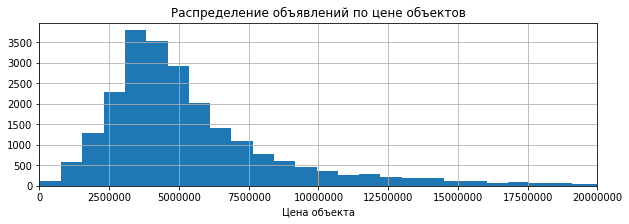

In [41]:
describe(data, 'last_price')
histogramm(data.last_price, 'Цена объекта','Распределение объявлений по цене объектов', xlim = 20000000, bins = 1000)

<font color='green'> количества комнат - наиболее типично 1 комната - 8036 объявлений. 2 комнаты - 7924 объявлений </font>

In [42]:
data.rooms.value_counts()

1     8036
2     7924
3     5797
4     1175
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

Число пропусков: 0
Типы данных: int64
Описание: count   23,650.00
mean         2.07
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64


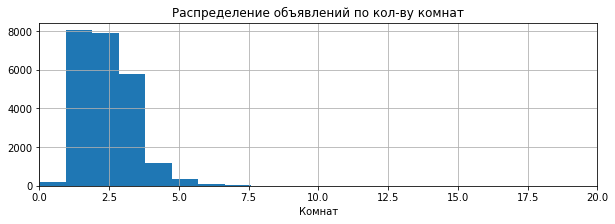

In [43]:
describe(data, 'rooms')
histogramm(data.rooms, 'Комнат','Распределение объявлений по кол-ву комнат',20, 20)

<font color='green'> поправил вывод и график. раньше использовал малое значение корзин в гистограмме, из за этого 1 и 2 этаж сливались </font> 

<div class="alert alert-danger">
<b>Комментарий ревьюера v.2</b> 
    
✍ 
Не соглашусь с тобой.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v.3</b> 
    
👍 

</div>

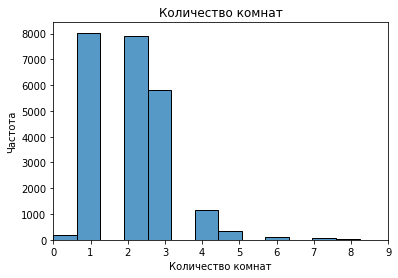

In [44]:
#Код ревьюера
sns.histplot(data['rooms'], kde=False, bins=30)
plt.xlim(0,9)
plt.title('Количество комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Частота')
plt.show()

<font color='green'> высота потолков - типичный потолок с высотой 2.7. Есть всплеск на 3 метрах </font>

Число пропусков: 9257
Типы данных: float64
Описание: count   14,393.00
mean         2.73
std          0.30
min          2.50
25%          2.52
50%          2.65
75%          2.80
max         10.30
Name: ceiling_height, dtype: float64


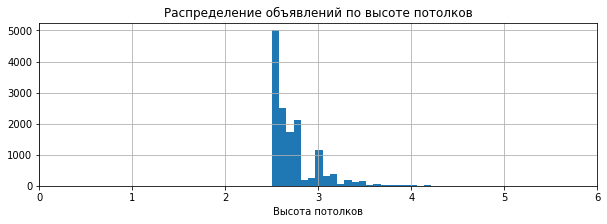

In [45]:
describe(data, 'ceiling_height')
histogramm(data.ceiling_height, 'Высота потолков','Распределение объявлений по высоте потолков',xlim = 6, bins = 100)

<font color='green'>этаж квартиры наиболее типичный этаж - 4-5 ый </font>

Число пропусков: 0
Типы данных: int64
Описание: count   23,650.00
mean         5.89
std          4.88
min          1.00
25%          2.00
50%          4.00
75%          8.00
max         33.00
Name: floor, dtype: float64


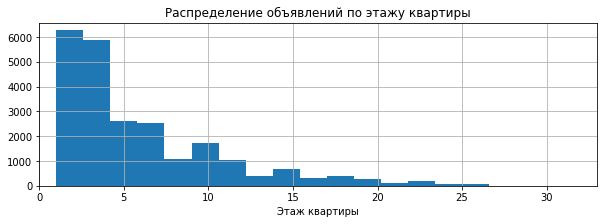

In [46]:
describe(data, 'floor')
histogramm(data.floor, 'Этаж квартиры','Распределение объявлений по этажу квартиры',xlim = 33, bins = 20)

<font color='green'> тип этажа квартиры («первый», «последний», «другой») - 17326 - объявлений - это не первый и не последний этаж;</font>

In [47]:
data.what_floor.value_counts()

Другой       17326
Последний     3440
Первый        2884
Name: what_floor, dtype: int64

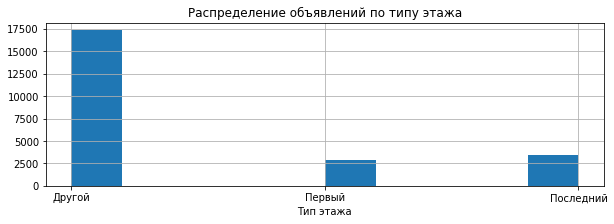

In [48]:
plt.figure(figsize=(10,3))
data.what_floor.hist()
plt.xlabel('Тип этажа')
plt.title('Распределение объявлений по типу этажа')
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера v.2</b> 
    
👍 Да, чаще всего продают не последний и не первый этажи - такие этажи могут быть проблемными (заглядывают прохожие, холодно, жарко, протекает крыша и т.д.)
    
Также это связано с этажностью строительства. Первый и последний этажи - это лишь по одному этажу, а группа "другой" включает в себя все этажи, кроме первого и последнего. Для 3-этажных домов мы бы увидели равномерное распределение, но строительство заметно выше, чем 3 этажа.
</div>

<font color='green'>общее количество этажей в доме - наиболее типичный этаж в доме - 9-10 этажей.</font>

Число пропусков: 0
Типы данных: int64
Описание: count   23,650.00
mean        10.67
std          6.59
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         60.00
Name: floors_total, dtype: float64


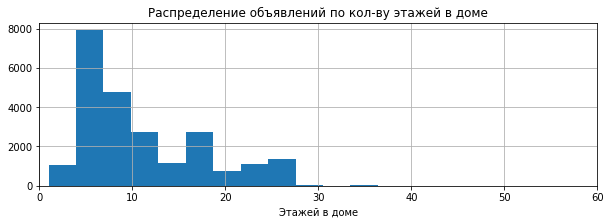

In [49]:
describe(data, 'floors_total')
histogramm(data.floors_total, 'Этажей в доме','Распределение объявлений по кол-ву этажей в доме', xlim = 60, bins = 20)

<font color='green'>расстояние до центра города в метрах - наиболее типично 13-14 км до центра</font>


Число пропусков: 5511
Типы данных: float64
Описание: count   18,139.00
mean    14,197.86
std      8,606.83
min        181.00
25%      9,241.00
50%     13,105.00
75%     16,293.00
max     65,968.00
Name: city_centers_nearest, dtype: float64


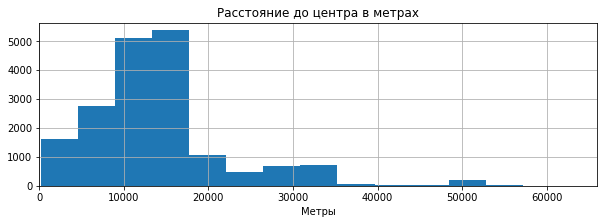

In [50]:
describe(data, 'city_centers_nearest')
histogramm(data.city_centers_nearest, 'Метры','Расстояние до центра в метрах', 66000, 15)

<font color='green'>расстояние до ближайшего аэропорта - наиболее типично ~27 км.</font>

Число пропусков: 5534
Типы данных: float64
Описание: count   18,116.00
mean    28,803.23
std     12,637.31
min          0.00
25%     18,575.75
50%     26,756.50
75%     37,294.00
max     84,869.00
Name: airports_nearest, dtype: float64


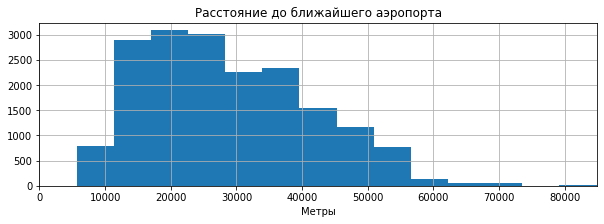

In [51]:
describe(data, 'airports_nearest')
histogramm(data.airports_nearest, 'Метры','Расстояние до ближайшего аэропорта', 85000, 15)


<font color='green'>расстояние до ближайшего парка</font>

Число пропусков: 0
Типы данных: int64
Описание: count   23,650.00
mean       167.36
std        306.83
min          0.00
25%          0.00
50%          0.00
75%        301.00
max      3,190.00
Name: parks_nearest, dtype: float64


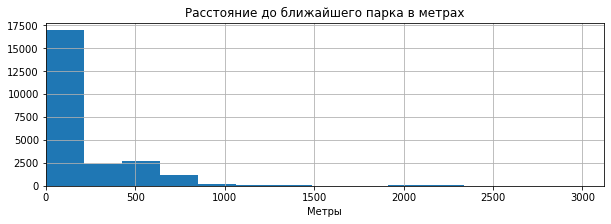

In [52]:
describe(data, 'parks_nearest')
histogramm(data.parks_nearest, 'Метры','Расстояние до ближайшего парка в метрах', xlim = 3120, bins = 15)

<font color='green'>день и месяц публикации объявления. - больше всего объвлений опубликовано в среду. Меньше всего - на выходных.</font>

In [53]:
data.day_of_week.value_counts().sort_index()

0    3606
1    4175
2    3966
3    4286
4    3992
5    1933
6    1692
Name: day_of_week, dtype: int64

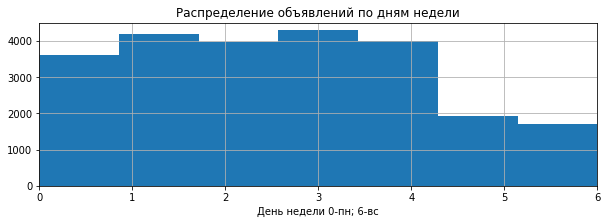

In [54]:
histogramm(data.day_of_week, 'День недели 0-пн; 6-вс','Распределение объявлений по дням недели', xlim = 6, bins = 7)

<font color='green'>Меньше всего публикуют объявления летом, в декабре и январе. Больше всего - в феврале/ марте</font>

In [55]:
data.month.value_counts().sort_index()

1     1491
2     2639
3     2582
4     2373
5     1270
6     1755
7     1690
8     1742
9     1979
10    2124
11    2367
12    1638
Name: month, dtype: int64

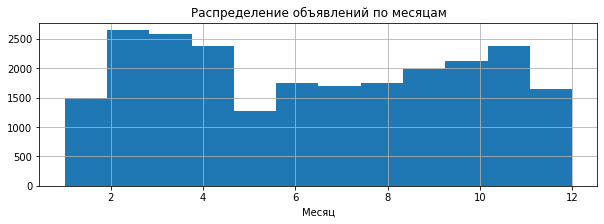

In [56]:
plt.figure(figsize=(10,3))
data.month.hist(bins = 12)
xlim = (0, 12)
plt.xlabel('Месяц')
plt.title('Распределение объявлений по месяцам')
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера v.2</b> 
    
👍 
Верно.
</div>

### Проведите исследовательский анализ данных

2. Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 
<br> * Постройте гистограмму.
<br> * Посчитайте среднее и медиану.
<br> * В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?



<font color='green'>Медианное время размещения - 95 дней. Среднее - 180. Если смотреть детальнее, можно найти пики на 45 и 60 дни размещения. Среднее и медианное число дней экспозиции снижается по годам: в 2014 - больше 800 дней (наверное, это старые объявления) Видимо рост кол-ва объявлений и рост популярности сервиса. Оборачиваемость недвижимости растет.

<br> 1. Необычайно долгими будем считать, когда days_exposition является выбросом. (на ящике с усами boxplot это точки) см. график
<br>2. Верхняя граница выбросов считается 75 перцентиль + 1.5 IQR.
<br>3. IQR = 75 перцентиль - 25 перцентиль = 231 - 45 = 186
<br>4. 1.5 * IQR = 1.5 * 186 = 279
<br>5. Граница выбросов days_exposition (больше которых будем считать очень долгой продажей) = 75 перцентиль + 1.5 * IQR = 231 + 279 = 510

<br>Если объявление размещается более 510 дней - это необычно долго</font>

Число пропусков: 3180
Типы данных: float64
Описание: count   20,470.00
mean       180.75
std        219.78
min          1.00
25%         45.00
50%         95.00
75%        231.00
max      1,580.00
Name: days_exposition, dtype: float64


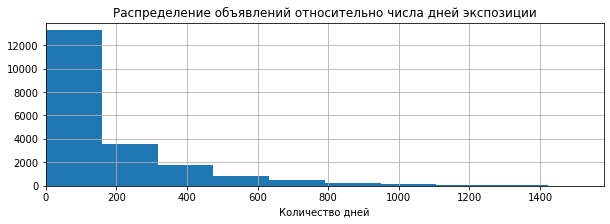

In [57]:
describe(data, 'days_exposition')
histogramm(data.days_exposition, 'Количество дней','Распределение объявлений относительно числа дней экспозиции',  xlim = 1580, bins = 10)

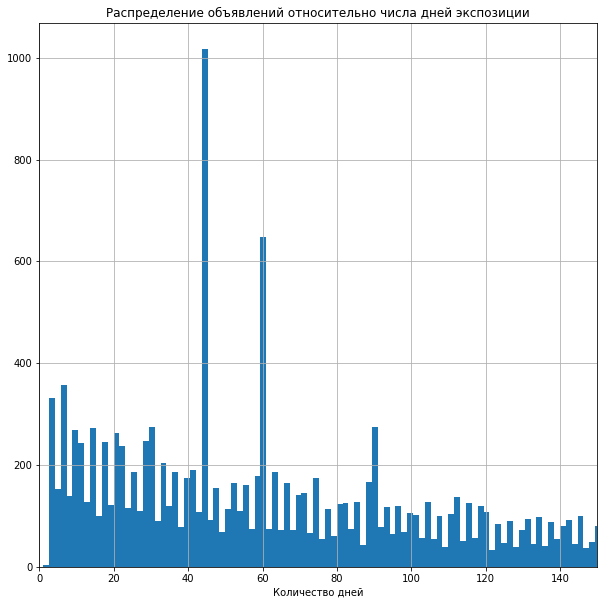

In [58]:
plt.figure(figsize=(10,10))    
data.days_exposition.hist(bins=1000)
plt.xlabel('Количество дней')
plt.title('Распределение объявлений относительно числа дней экспозиции')
plt.xlim(0,150)
plt.show()


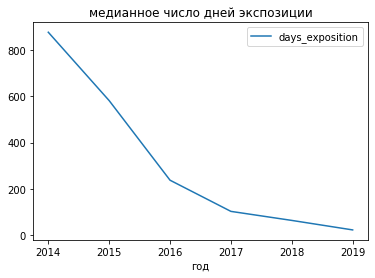

In [59]:
# медианное число дней экспозиции по годам
days_exposition_median = data.pivot_table(    
    index='year', 
    values='days_exposition', 
    aggfunc='median'
).fillna(0).reset_index()

days_exposition_median.plot(x='year') 
plt.xlabel('год')
plt.title('медианное число дней экспозиции')
plt.show()

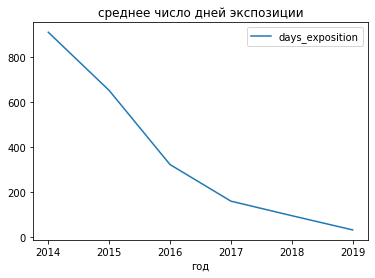

In [60]:
# среднее число дней экспозиции по годам
mean_days_stat = data.pivot_table(    
    index='year', 
    values='days_exposition', 
    aggfunc='mean'
).fillna(0).reset_index()

mean_days_stat.plot(x='year') 
plt.xlabel('год')
plt.title('среднее число дней экспозиции')
plt.show()

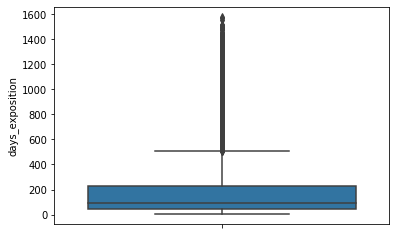

In [61]:
sns.boxplot(data=data, y='days_exposition' )
sns.figsize=(10,3)
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Да, до 1.5 месяцев можно считать быстрой продажей
</div>

3. Какие факторы больше всего влияют на общую (полную) стоимость объекта?
 Изучите, зависит ли цена от:
<br> 1. общей площади;
<br> 2. жилой площади;
<br> 3. площади кухни;
<br> 4. количества комнат;
<br> 5. этажа, на котором расположена квартира (первый, последний, другой);
<br> 6. даты размещения (день недели, месяц, год).
<br> Постройте графики.

<font color='green'>Для начала,  посмотрим распределение (Ящики с усами) у фичей, которые влияют на цену. 
<br>Предлагаю найти пороговую границу для каждого параметра, чтобы написать срез наиболее типичных квартир и отсеять выбросы
<br> Далее, на тепловой карте отранжируем корреляцию цены и параметров. </font>

In [62]:
feature_dict = {'total_area':'Распределение общей площади',
                'living_area':'Распределение жилой площади',
                'kitchen_area': 'Распределение кухонной площади',
                'rooms': 'Распределение числа комнат',
                'last_price': 'Распределение цены'}

Верхняя граница выбросов 114.25


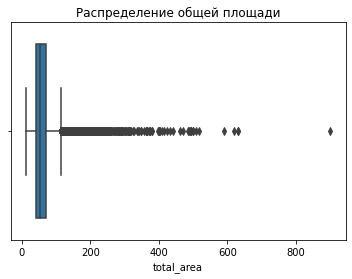

Верхняя граница выбросов 77.85


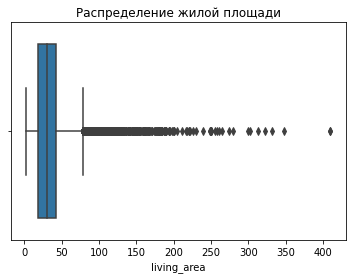

Верхняя граница выбросов 19.5


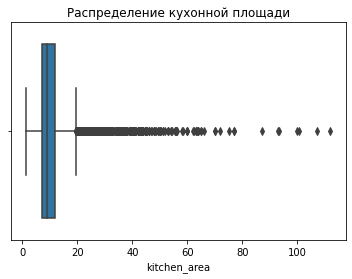

Верхняя граница выбросов 6.0


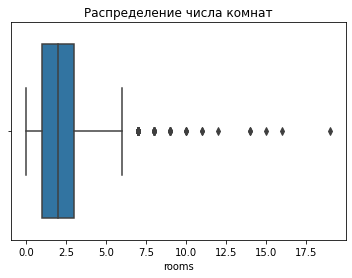

Верхняя граница выбросов 11897500.0


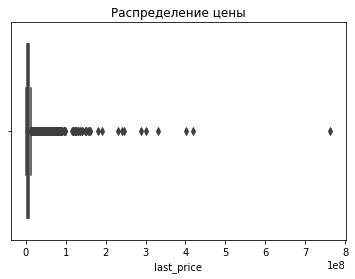

In [63]:
for k, v in feature_dict.items():
    IQR = np.nanpercentile(data[k], 75) - np.nanpercentile(data[k], 25)
    upper_outliers_border = np.nanpercentile(data[k], 75) + 1.5 * IQR
    print('Верхняя граница выбросов', upper_outliers_border)
    sns.boxplot(x = k, data = data)
    plt.title(v, fontsize = 12)
    plt.show()

In [64]:
ind = data.query('total_area <= 150').index

data[~data.index.isin(ind)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,cost_per_meter,day_of_week,month,year,what_floor,living_total_ratio,kitchen_total_ratio,city_centers_nearest_km
3,0,"64,900,000.00",159.00,2015-07-24,3,NaN,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,"28,098.00","6,800.00",2.00,84,3.00,234.00,424.00,"408,176.10",4,7,2015,Другой,NaN,NaN,7.00
42,13,"22,000,000.00",161.80,2015-07-08,4,2.80,4,80.90,2,False,False,False,17.60,5,Петергоф,"35,416.00","30,605.00",2.00,47,1.00,907.00,987.00,"135,970.33",2,7,2015,Другой,0.50,0.11,31.00
51,7,"45,000,000.00",161.00,2017-10-17,3,3.20,8,38.00,4,False,False,False,50.00,0,Санкт-Петербург,"32,537.00","6,589.00",0.00,0,3.00,99.00,541.00,"279,503.11",1,10,2017,Другой,0.24,0.31,7.00
121,20,"33,000,000.00",180.00,2017-02-17,3,2.90,9,86.00,8,False,False,False,24.00,4,Санкт-Петербург,"25,689.00","4,264.00",1.00,633,0.00,NaN,144.00,"183,333.33",4,2,2017,Другой,0.48,0.13,5.00
147,10,"27,700,000.00",179.60,2017-07-06,5,2.85,25,97.20,25,False,False,False,33.80,2,Санкт-Петербург,"19,424.00","4,489.00",0.00,0,1.00,806.00,75.00,"154,231.63",3,7,2017,Последний,0.54,0.19,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23400,17,"30,000,000.00",213.00,2017-09-28,7,3.40,5,151.40,5,False,False,False,30.80,0,Санкт-Петербург,"21,146.00","1,225.00",2.00,342,3.00,30.00,299.00,"140,845.07",3,9,2017,Последний,0.71,0.14,2.00
23448,3,"14,700,000.00",180.00,2018-02-08,6,3.00,6,126.00,5,False,False,False,20.00,0,Санкт-Петербург,"23,955.00","5,089.00",0.00,0,2.00,616.00,NaN,"81,666.67",3,2,2018,Другой,0.70,0.11,6.00
23491,20,"21,800,000.00",250.00,2017-09-16,3,NaN,12,104.00,7,False,False,False,45.00,0,Санкт-Петербург,"43,558.00","13,138.00",0.00,0,0.00,NaN,49.00,"87,200.00",5,9,2017,Другой,0.42,0.18,14.00
23549,5,"19,600,000.00",184.00,2016-04-21,3,3.00,19,55.70,19,False,False,False,24.50,5,Санкт-Петербург,"18,995.00","4,837.00",0.00,0,0.00,NaN,205.00,"106,521.74",3,4,2016,Последний,0.30,0.13,5.00


In [65]:
#Срез наиболее типичных квартир без выбросов
common_flats = data.query('total_area <= 150')   # убираем выбросы
common_flats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23088 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23088 non-null  int64         
 1   last_price               23088 non-null  float64       
 2   total_area               23088 non-null  float64       
 3   first_day_exposition     23088 non-null  datetime64[ns]
 4   rooms                    23088 non-null  int64         
 5   ceiling_height           14013 non-null  float64       
 6   floors_total             23088 non-null  int64         
 7   living_area              21257 non-null  float64       
 8   floor                    23088 non-null  int64         
 9   is_apartment             23088 non-null  bool          
 10  is_studio                23088 non-null  bool          
 11  is_open_plan             23088 non-null  bool          
 12  kitchen_area             20887 n

<font color='green'>
Переписал фильтрующий запрос - если площадь наиболее влияющий показатаель, то давайте на уровне общей total_area удалим выбросы. Всего 562 записи с total area больше 150 метров, которые мы удаляем
</font>


<div class="alert alert-danger">
<b>Комментарий ревьюера v.2</b> 
    
✍ 
<s>Здесь мы теряем больше 20% данных. Стоит проводить фильтрацию аккуратно. Удалять более 10% данных мы не можем. Если выбросы - более 10%, то это уже не выбросы, а наоборот один из трендов.
</div>

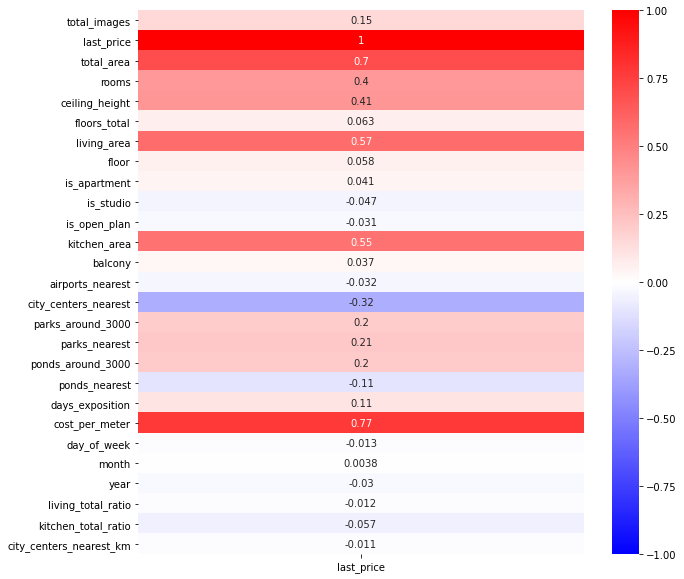

In [66]:
plt.figure(figsize=(10,10))
corr_matrix = np.triu(common_flats.corr())
sns.heatmap(common_flats.corr()[['last_price']], vmin = -1, vmax = +1, annot = True, cmap = 'bwr')
plt.show()


<font color='green'>

Больше всего с общей ценой за квартиру коррелирует в порядке убывания:
<br> 1. total_area - общая площадь. Коэфф корелл. 0.7
<br> 2. living_area - жилая площадь. Коэфф корелл. 0.57
<br> 3. kitchen_area - площадь кухни. Коэфф корелл 0.55
<br> По сути - главное, что влияет на итоговую цену - площадь
<br> 
<br> До 16 года наблюдался спад средней цены типовых квартир - цена снизилась до 4.72 млн. и далее пошла в рост.
<br> Более дорогие лоты в фев-марте, в июне спад и далее рост до декабря
<br> Рост цен идет с пн-среда. На выходных наоборот - в среднем более дешевые варианты</font>

<div class="alert alert-success">
<b>Комментарий ревьюера v.2</b> 
    
👍 
Верная интерпретация полученных данных.
</div>

,last_price
year,
2014,"9,455,486.54"
2015,"6,574,340.44"
2016,"5,745,354.78"
2017,"5,597,539.40"
2018,"5,478,000.31"
2019,"6,062,595.96"


Text(0.5, 1.0, 'Цена от года размещения объявления')

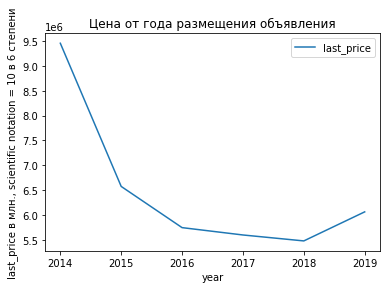

In [67]:
common_flats_pivot = common_flats.pivot_table(
    index = 'year', 
    values = 'last_price', 
    aggfunc = 'mean'
    ).fillna(0)
display(common_flats_pivot)
ax = common_flats_pivot.plot(xticks=common_flats_pivot.index)
ylab = ax.set_ylabel('last_price в млн., scientific notation = 10 в 6 степени')
plt.title('Цена от года размещения объявления')



,last_price
month,
1,"5,798,160.88"
2,"5,689,400.84"
3,"5,573,369.10"
4,"5,814,828.36"
5,"5,570,625.89"
6,"5,564,872.56"
7,"5,615,171.48"
8,"5,825,061.11"
9,"5,744,567.57"


Text(0.5, 1.0, 'Цена от месяца размещения объявления')

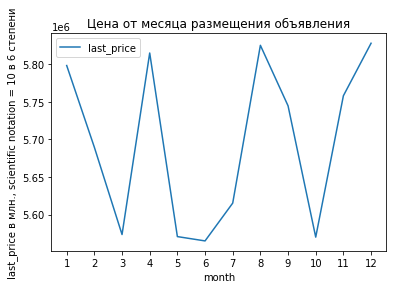

In [68]:
common_flats_pivot = common_flats.pivot_table(
    index = 'month', 
    values = 'last_price', 
    aggfunc = 'mean'
    ).fillna(0)
display(common_flats_pivot)
ax = common_flats_pivot.plot(xticks=common_flats_pivot.index)
ylab = ax.set_ylabel('last_price в млн., scientific notation = 10 в 6 степени')
plt.title('Цена от месяца размещения объявления')


,last_price
day_of_week,
0,"5,684,855.76"
1,"5,747,535.76"
2,"5,705,701.03"
3,"5,878,351.92"
4,"5,639,203.84"
5,"5,514,325.88"
6,"5,448,656.58"


Text(0.5, 1.0, 'Цена от дня недели размещения объявления')

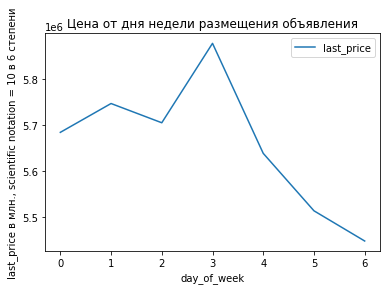

In [69]:
common_flats_pivot = common_flats.pivot_table(
    index = 'day_of_week', 
    values = 'last_price', 
    aggfunc = 'mean'
    ).fillna(0)
display(common_flats_pivot)
ax = common_flats_pivot.plot(xticks=common_flats_pivot.index)
ylab = ax.set_ylabel('last_price в млн., scientific notation = 10 в 6 степени')
plt.title('Цена от дня недели размещения объявления')


Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name

In [70]:
#топ 10 населеных пунктов по числу объявлений
print(common_flats['locality_name'].value_counts().head(10))

Санкт-Петербург      15194
поселок Мурино         556
поселок Шушары         440
Всеволожск             397
Пушкин                 359
Колпино                337
поселок Парголово      326
Гатчина                307
деревня Кудрово        299
Выборг                 235
Name: locality_name, dtype: int64


In [71]:
#срез по топ 10 городов по кол-ву типичных объявлений
top_ten = common_flats['locality_name'].value_counts().index[:10]

common_flats_top_ten = common_flats[common_flats.locality_name.isin(top_ten)]

In [72]:
display(common_flats_top_ten.pivot_table(index='locality_name', values='cost_per_meter',  aggfunc='mean')
        .sort_values(by='cost_per_meter')
        .round(2))


,cost_per_meter
locality_name,
Выборг,"58,075.89"
Всеволожск,"68,703.12"
Гатчина,"68,746.15"
Колпино,"75,333.30"
поселок Шушары,"78,677.36"
поселок Мурино,"85,681.76"
поселок Парголово,"90,332.26"
деревня Кудрово,"92,473.55"
Пушкин,"102,866.52"


<div class="alert alert-danger">
<b>Комментарий ревьюера v.2</b> 
    
✍ 
Таблица верна, но у нас нехватка данных после фильтрации. Давай взглянем еще раз после возвращения данных.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v.3</b> 
    
👍 
Да, теперь верно.
</div>

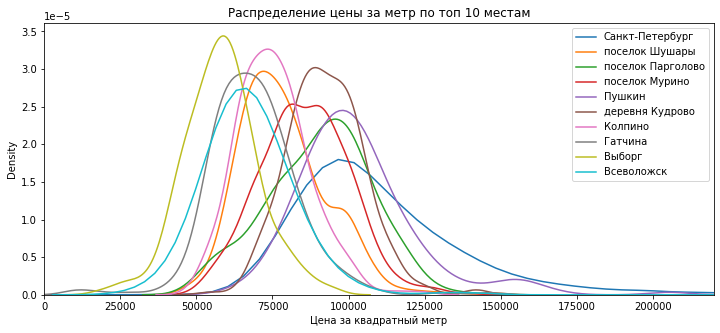

In [73]:
fig, ax = plt.subplots(figsize=(12, 5)) 


for loc in common_flats_top_ten.locality_name.unique():
    sns.kdeplot(common_flats_top_ten[common_flats_top_ten.locality_name == loc].cost_per_meter, label = loc)

plt.legend(bbox_to_anchor = (1,1)) 
plt.title('Распределение цены за метр по топ 10 местам')
plt.xlabel('Цена за квадратный метр') 
plt.xlim((0,220000))
plt.show()

<font color='green'>Наибольшая средняя цена за метр в Санкт-Петербурге - 112 тыс. рублей
Наиболее дешевые - Выборг и Всеволжск  - 58 и 68 тыс. за метр.</font>

Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.


<div class="alert alert-danger">
<b>Комментарий ревьюера v.1</b> 
    
✍ 
<s>Здесь, к сожалению у нас теряется структура. Прошу тебя строго следовать шагам ТЗ и делать ровно в том порядке, который там указан, а именно:
    
* Построить гистограммы отдельно к каждому параметру по списку и сделать вывод под каждым.
    
* Далее изучить, как быстро продавались квартиры
    
* Только потом приступить к вопросу зависимостей от параметров и так далее по списку.
    
Прошу тебя привести работу в порядок и прислать на повторное ревью.
</div>

In [74]:
common_flats['city_centers_nearest_km'] = common_flats.loc[:,'city_centers_nearest'].div(1000).fillna(0).round(0)

spb_common_flats = common_flats[common_flats['locality_name'] == 'Санкт-Петербург']

spb_common_flats.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,cost_per_meter,day_of_week,month,year,what_floor,living_total_ratio,kitchen_total_ratio,city_centers_nearest_km
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,"18,863.00","16,028.00",1.00,482,2.00,755.00,NaN,"120,370.37",3,3,2019,Другой,0.47,0.23,16.00
2,10,"5,196,000.00",56.00,2015-08-20,2,NaN,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,"21,741.00","13,933.00",1.00,90,2.00,574.00,558.00,"92,785.71",3,8,2015,Другой,0.61,0.15,14.00
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,"31,856.00","8,098.00",2.00,112,1.00,48.00,121.00,"100,000.00",1,6,2018,Другой,0.32,0.41,8.00
7,5,"7,915,000.00",71.60,2019-04-18,2,NaN,24,NaN,22,False,False,False,18.90,2,Санкт-Петербург,"23,982.00","11,634.00",0.00,0,0.00,NaN,NaN,"110,544.69",3,4,2019,Другой,NaN,0.26,12.00
9,18,"5,400,000.00",61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,"50,898.00","15,008.00",0.00,0,0.00,NaN,289.00,"88,524.59",6,2,2017,Другой,0.71,0.11,15.00


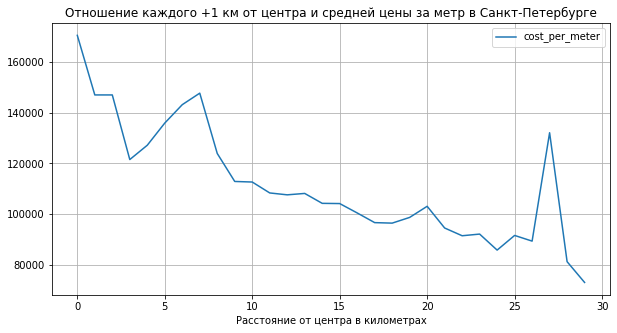

In [75]:
spb_common_flats_pivot= spb_common_flats.pivot_table(index = 'city_centers_nearest_km', values= 'cost_per_meter', aggfunc='mean')

spb_common_flats_pivot.head(10)
spb_common_flats_pivot.plot(figsize=(10,5), grid=True)
plt.title('Отношение каждого +1 км от центра и средней цены за метр в Санкт-Петербурге')
plt.xlabel('Расстояние от центра в километрах') 
plt.show()

<font color='green'> С ростом расстояния от центра, цена за метр снижается </font>

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Верно, дальше от центра - дешевле квартиры.
</div>

### Напишите общий вывод


# Выводы:

<font color='green'> 


1. Данные с 27 ноября 2014 по 3 мая 2019 г., резкий рост начался в начале 2017 г.

2. ~90% квартир до 100 метров, наиболее типичная общая площадь - 52-60 метров

3. Типичная площадь кухни - 9-10 метров

4. ~90% квартир до 60 метров жилой площади. Наиболее типичная 30-34 метра

5. Наиболее типичная цена проданной квартиры - 5 млн. рублей

6. Количества комнат - наиболее типично 1 комната - 8036 объявлений. 2 комнаты - 7924 объявлений

7. Высота потолков - типичный потолок с высотой 2.7. Есть всплеск на 3 метрах

8. Этаж квартиры наиболее типичный этаж - 4-5 ый

9. Общее количество этажей в доме - наиболее типичный этаж в доме - 9-10 этажей

10. Расстояние до центра города в метрах - наиболее типично 13-14 км до центра

11. Расстояние до ближайшего аэропорта - наиболее типично ~27 км

12. Больше всего объвлений опубликовано в среду. Меньше всего - на выходных

13. Меньше всего публикуют объявления летом, в декабре и январе. Больше всего - в феврале/ марте


14. Медианное время размещения - 95 дней. Среднее - 180. Если смотреть детальнее, можно найти пики на 45 и 60 дни размещения. Среднее и медианное число дней экспозиции снижается по годам: в 2014 - больше 800 дней (наверное, это старые объявления) Видимо рост кол-ва объявлений и рост популярности сервиса. Оборачиваемость недвижимости растет.

<br> 15. Необычайно долгими будем считать, когда days_exposition является выбросом. (на ящике с усами boxplot это точки) см. график
<br> *Верхняя граница выбросов считается 75 перцентиль + 1.5 IQR.
<br> *IQR = 75 перцентиль - 25 перцентиль = 231 - 45 = 186
<br> *1.5 * IQR = 1.5 * 186 = 279
<br> *Граница выбросов days_exposition (больше которых будем считать очень долгой продажей) = 75 перцентиль + 1.5 * IQR = 231 + 279 = 510

<br>Если объявление размещается более 510 дней - это необычно долго


16. Больше всего с общей ценой за квартиру коррелирует в порядке убывания:
<br> 1. total_area - общая площадь. Коэфф корелл. 0.7
<br> 2. living_area - жилая площадь. Коэфф корелл. 0.57
<br> 3. kitchen_area - площадь кухни. Коэфф корелл 0.55

<br> По сути - главное, что влияет на итоговую цену - площадь
<br> 
17. До 16 года наблюдался спад средней цены типовых квартир - цена снизилась до 4.72 млн. и далее пошла в рост.
18. Более дорогие лоты в фев-марте, в июне спад и далее рост до декабря
19. Рост цен идет с пн-среда. На выходных наоборот - в среднем более дешевые варианты

20. Наибольшая средняя цена за метр в Санкт-Петербурге - 112 тыс. рублей
21. Наиболее дешевые - Выборг и Всеволжск  - 58 и 68 тыс. за метр
22. С ростом расстояния от центра, цена за метр снижается
    
</font> 

<div class="alert alert-success">
<b>Комментарий ревьюера v.2</b> 
    
👍 
Выводы понятны и логичны, а самое главное подкреплены выявленными фактами, но не забудь, пожалуйста перепроверить их после корректировок.
</div>

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-success">
<b>Обратная связь v.1</b> 
    
👋  
Андрей, замечательная работа, ты мыслишь нестандартно, это отличный навык, который у тебя уже есть, ты последователен и вдумчив. Твою работу очень интересно читать и проверять.  Я оставил несколько обязательных поправок для тебя и после этого буду готов сразу принять проект. 

Удачи в доработках, жду!  

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-success">
<b>Обратная связь v.2</b> 
    
👋 
      
Андрей, спасибо за исправления критических моментов, а также спасибо за хорошую работу.
    
Поздравляю с успешным завершением проекта 😊👍
    
И желаю успехов в новых работах 😊

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод